In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(
accuracy_score,
confusion_matrix,
precision_score,
recall_score,
classification_report,
roc_curve,
roc_auc_score
)
from sklearn.impute import SimpleImputer

# 1. Data Preparation

In [17]:
# import the data
hd = pd.read_csv('heart_disease_uci.csv')

In [4]:
# number of rows and columns
hd.shape

(920, 16)

In [5]:
# the 5 first rows
hd.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
# missing values
hd.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [63]:
# copy dataset
hd_copy = hd.copy()

In [64]:
# work with missing values

hd_copy = hd_copy.replace('?', np.nan)

# List of columns to impute
numerical_cols = ['trestbps', 'chol', 'thalch', 'oldpeak']
categorical_cols = ['fbs', 'restecg', 'exang', 'slope']
# Complex columns with a large number of missing values
high_missing_cols = ['ca', 'thal']

# Imputation of numeric columns using the median
imputer_median = SimpleImputer(strategy='median')
hd_copy[numerical_cols] = imputer_median.fit_transform(hd_copy[numerical_cols])

# Imputation of categorical columns using the mode
imputer_mode = SimpleImputer(strategy='most_frequent')
hd_copy[categorical_cols] = imputer_mode.fit_transform(hd_copy[categorical_cols])

# Imputing 'ca' and 'thal' with a new category (e.g., '4' or 'unknown')
# In this case, 'ca' and 'thal' must be converted to numeric types
# before applying the imputer or One-Hot Encoding.
# Simplest option: replace NaN with 'Unknown'
for col in high_missing_cols:
    hd_copy[col] = hd_copy[col].fillna('Unknown')

In [65]:
hd_copy.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [66]:
# drop the column with id and dataset
hd_copy = hd_copy.drop(['id', 'dataset'], axis=1)

In [68]:
# labels
hd_copy['sex'] = hd_copy['sex'].replace({'Male': 0, 'Female': 1})

In [69]:
# encode num column
hd_copy['num'] = np.where(hd_copy['num'] > 0, 1, 0)

In [70]:
# One-Hot encoding
ohe_cols = ['cp', 'restecg', 'slope', 'thal', 'ca']
hd_copy = pd.get_dummies(hd_copy, columns=ohe_cols, drop_first=True)

In [71]:
hd_copy.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_atypical angina,...,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,ca_1.0,ca_2.0,ca_3.0,ca_Unknown
0,63,0,145.0,233.0,True,150.0,False,2.3,0,False,...,False,False,False,True,False,False,False,False,False,False
1,67,0,160.0,286.0,False,108.0,True,1.5,1,False,...,False,True,False,False,True,False,False,False,True,False
2,67,0,120.0,229.0,False,129.0,True,2.6,1,False,...,False,True,False,False,False,True,False,True,False,False
3,37,0,130.0,250.0,False,187.0,False,3.5,0,False,...,False,False,False,False,True,False,False,False,False,False
4,41,1,130.0,204.0,False,172.0,False,1.4,0,True,...,False,False,True,False,True,False,False,False,False,False


In [72]:
# we need to encode our target feature
y = hd_copy['num']

In [73]:
# drop the target feature from the dataset
hd_copy = hd_copy.drop('num', axis = 1)

# 2. Model Training

In [75]:
# we need to make features for X
X = hd_copy

In [77]:
# we have to make standartscale to standartizise our features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [80]:
# Logistic Regression

model_lr = LogisticRegression(max_iter = 5000)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

# 3. Model Evaluation

In [86]:
# accuracy and recall
accuracy = accuracy_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)

print(f'''The main evaluation:
{'=' * 20}
Accuracy | {accuracy:.2f}
Recall   | {recall:.2f}''')

The main evaluation:
Accuracy | 0.83
Recall   | 0.89


In [87]:
# check the classification report to see all evaluation
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        82
           1       0.81      0.89      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.82       184



In [88]:
# confusion matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_lr)

<Axes: >

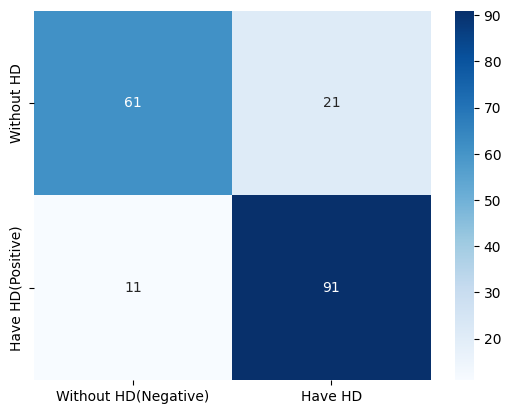

In [89]:
# heatmap of confusion matrix
sns.heatmap(
  confusion_matrix_logistic,
  annot = True,
  fmt='d',
  cmap = 'Blues',
  xticklabels = ['Without HD(Negative)', 'Have HD'],
  yticklabels = ['Without HD', 'Have HD(Positive)'],
)

### Conclusion:
As our primary goal is the prediction of heart disease, we are focused on minimizing False Negative cases. This makes the Recall metric the most critical measure for evaluating the model's effectiveness.
- Recall = 0.89: This indicates that our Logistic Regression model successfully identifies $89\%$ of all patients who are truly sick (True Positives).
- Context (False Negatives): This is an extremely important indicator, as only $11\%$ of patients with the actual disease were incorrectly classified as healthy (False Negatives). This high Recall ensures that the vast majority of sick individuals will receive the necessary attention.
- Model Utilization: Given its high Recall score, the Logistic Regression model has demonstrated its effectiveness and can be utilized for predicting heart disease, providing a low risk of missing sick patients.